# Troubleshooting Notebook

I case you have any problems with a notebook session, please refer to this notebook. It will guide you through the most common problems and how to solve them.

## 1 - Running the server and interface


By default, you can simply import and run the `start_server_and_interface`function to directly start the server and interface from a Notebook cell. It is possible it doesn't work on some machine. 

If you don't have problems starting the serve, you can skip this section. Otherwise, don't worry, you can still run the server and interface manually. Let's see how to do this in the next section.

In [1]:
from vivarium.controllers.notebook_controller import NotebookController
from vivarium.utils.handle_server_interface import start_server_and_interface, stop_server_and_interface

Execute the following cell to start the simulator and the interface. Here we have an error, so we will launch them manually from command line.

In [3]:
start_server_and_interface(scene_name="quickstart")

FileNotFoundError: [WinError 2] The system cannot find the file specified

Open two terminal sessions and activate the virtual environment on both of them. 

**For Windows:**
```bash
cd \Path\to\the\project\vivarium
.\myvenv\Scripts\activate
```

**For Linux/Mac:**
```bash
cd /Path/to/the/project/vivarium
source myvenv/bin/activate
```

then, in the first terminal, run the following command to start the server with a specific `scene_name:` (make sure to replace it by the actual name of the scene you want to run, `quickstart` in this case):

```bash
python3 scripts/run_server.py scene=scene_name
```

If you use Windows, replace `python3` by `python`. When it is launched, you shoulmd see something like that in your terminal : 

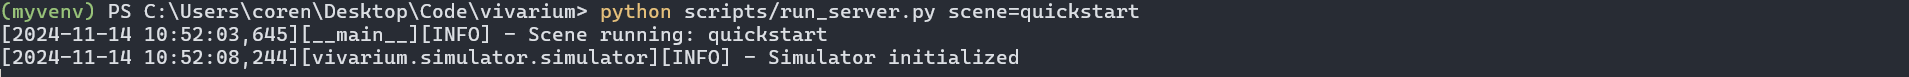



In the second terminal, run the following command to start the interface:

```bash
panel serve scripts/run_interface.py --args --notebook_mode True
```

It will give you a clickable link to open the interface in your browser. If you don't see the link, you can manually open it by going to `http://localhost:5006/run_interface`. You should see something like that in your terminal :

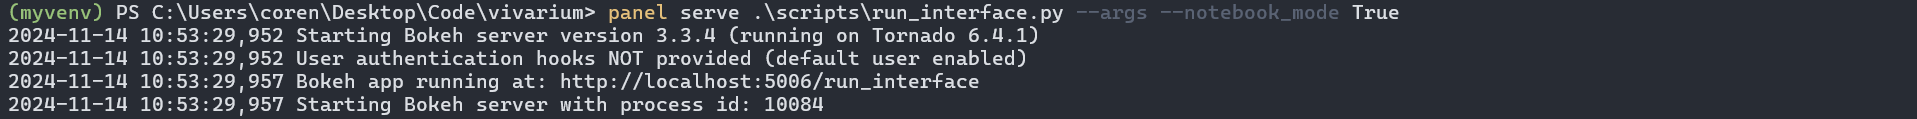

## 2 - Checking the Notebook controller works

Great, now youi have a server and interface running, you can then instantiate a `controller` object. 

In [2]:
controller = NotebookController()

Now, check it he controller is working by first printing its list of agents.

In [5]:
controller.agents

Next, we start the simulation:

In [ ]:
controller.run()

Check the controller is running well.

In [4]:
print(controller._is_running)

True


To visually test if everything works well, you can just set one of the agents motor value to 0.5 to see if it rotates. You should now see it turning at a constant speed after running the cell.

In [5]:
controller.agents[0].left_motor = 0.5

In [8]:
controller.stop()

## 3 - Debugging the Notebook controller

Good you have a server, and interface and a controller running. You can now play with the simulation, but it is possible that you encounter some problems. Here are some common issues and how to solve them.

If you encounter an error with the controller, and the server and interface are already running, you can just import the NoteBookController class and create a controller object like that :

In [10]:
from vivarium.controllers.notebook_controller import NotebookController

controller = NotebookController()

In [ ]:
controller.run()

In [4]:
controller.agents[0].left_motor = 0.5

3.1 - **Assigning invalid value types to entities**: If you assign a value that is not valid to an entity, you will get an error. For example, if you try to assign a string to a motor value, you will get an error. Make sure you are assigning the correct type of value to each entity.

In [6]:
controller.agents[0].right_motor = "example_string"

Exception in thread Thread-5 (_run):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\coren\Desktop\Code\vivarium\myvenv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "c:\users\coren\desktop\code\vivarium\vivarium\controllers\notebook_controller.py", line 538, in _run
    entity.set_events()
  File "c:\users\coren\desktop\code\vivarium\vivarium\controllers\notebook_controller.py", line 58, in set_events
    setattr(self.config, k, v)
  File "c:\Users\coren\Desktop\Code\vivarium\myvenv\lib\site-packages\param\parameterized.py", line 525, in _f
    instance_param.__set__(obj,

If an error like that occurs, you can just re-run the cell where you create the controller object.

3.2 - **Assigning invalid value ranges to entities**: If you assign a value that is outisde of defined bounds for an entity, you will get an error. For example, if you try to assign a value > 1 or < 0 to a motor value, you will get an error. Make sure you are assigning the correct range of values to each entity.

In [14]:
from vivarium.controllers.notebook_controller import NotebookController

controller = NotebookController()
controller.run()

controller.agents[0].right_motor = 0.5

In [ ]:
controller.agents[0].right_motor = 15.3

Exception in thread Thread-27 (_run):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\coren\Desktop\Code\vivarium\myvenv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "c:\users\coren\desktop\code\vivarium\vivarium\controllers\notebook_controller.py", line 538, in _run
    entity.set_events()
  File "c:\users\coren\desktop\code\vivarium\vivarium\controllers\notebook_controller.py", line 58, in set_events
    setattr(self.config, k, v)
  File "c:\Users\coren\Desktop\Code\vivarium\myvenv\lib\site-packages\param\parameterized.py", line 525, in _f
    instance_param.__set__(obj

3.3 - **Debugging errors in routines or behaviors**: If you assign a value that is outisde of defined bounds for an entity, you will get an error. For example, if you try to assign a value > 1 or < 0 to a motor value, you will get an error. Make sure you are assigning the correct range of values to each entity.

In [1]:
from vivarium.controllers.notebook_controller import NotebookController

controller = NotebookController()
controller.run()

Exception in thread Thread-4 (_run):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\coren\Desktop\Code\vivarium\myvenv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "c:\users\coren\desktop\code\vivarium\vivarium\controllers\notebook_controller.py", line 548, in _run
    entity.behave(self.time)
  File "c:\users\coren\desktop\code\vivarium\vivarium\controllers\notebook_controller.py", line 288, in behave
    self.left_motor, self.right_motor = motor_values
TypeError: cannot unpack non-iterable numpy.float64 object


In [2]:
controller.agents[0].right_motor = 0.5

In [3]:
# correct behavior
def correct_love_shy(robot):
    left, right = robot.sensors()
    left_wheel = 1 - right
    right_wheel = 1 - left   
    return left_wheel, right_wheel

# correct behavior
def incorrect_love_shy(robot):
    left, right = robot.sensors()
    # error : value of wheel that is beyond bounds (0 - 1)
    left_wheel = 1000 - right
    # error : return only 1 value of motor
    return left_wheel

First attach a correct behavior:

In [4]:
controller.agents[1].attach_behavior(correct_love_shy)
controller.agents[1].start_all_behaviors()

Then an incorrect one:

In [5]:
controller.agents[2].attach_behavior(incorrect_love_shy)
controller.agents[2].start_all_behaviors()

Nothing happens ! 

## 4 - Stopping everything